<a href="https://colab.research.google.com/github/Femioyegun/devops-fully-automated/blob/main/Personal_loan_project_Oluwafemi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
from sklearn import metrics


In [15]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path="/content/drive/MyDrive/Loan_Modelling/Loan_Modelling.csv"
df=pd.read_csv(path)
df.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [13]:
%%shell
jupyter nbconvert --to html ///content/Untitled4.ipynb

[NbConvertApp] Converting notebook ///content/Untitled4.ipynb to html
[NbConvertApp] Writing 1727790 bytes to /content/Untitled4.html


In [4]:
df.shape

(5000, 14)

There are 5000 rows and 14 colums.

In [5]:
import pandas as pd

# Assuming df is your DataFrame
print(df.isnull().sum())


ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64


There are no missing value in our dataset

In [4]:
df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


1.The max 5000, The mean for personnal loan is 0.096 and the std is 0.29



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In our datatype: float64 = 1, int64 = 13

The memory usage: 547.0 KB

**Exploratory Data Analysis.**



1.What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3.What are the attributes that have a strong correlation with the target attribute (personal loan)?

4.How does a customer's interest in purchasing a loan vary with their age?

5.How does a customer's interest in purchasing a loan vary with their education?









**1.What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?**

   ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.0

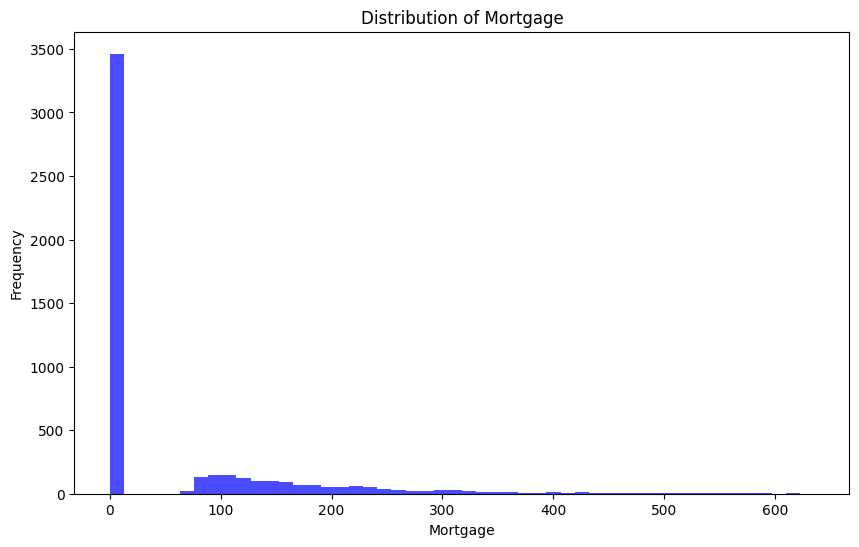

Number of Outliers Detected in 'Mortgage': 291
        ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
22      23   29           5      62    90277       1    1.2          1   
39      40   38          13      80    94115       4    0.7          3   
42      43   32           7     132    90019       4    1.1          2   
59      60   31           5     188    91320       2    4.5          1   
66      67   62          36     105    95670       2    2.8          1   
...    ...  ...         ...     ...      ...     ...    ...        ...   
4859  4860   34           8     165    91107       1    7.0          3   
4865  4866   50          24     133    90025       4    1.4          2   
4899  4900   54          29      85    94928       4    1.3          3   
4942  4943   52          26     109    94710       1    2.4          1   
4963  4964   32           6      98    95054       2    4.5          3   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  O

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Loan_Modelling/Loan_Modelling.csv')

# Display the first few rows of the dataframe
print(df.head())

# Display descriptive statistics of the 'Mortgage' attribute
print(df['Mortgage'].describe())

# Plot the distribution of 'Mortgage'
plt.figure(figsize=(10, 6))
plt.hist(df['Mortgage'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Mortgage')
plt.xlabel('Mortgage')
plt.ylabel('Frequency')
plt.show()

# Identify outliers
Q1 = df['Mortgage'].quantile(0.25)
Q3 = df['Mortgage'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Mortgage'] < lower_bound) | (df['Mortgage'] > upper_bound)]
print("Number of Outliers Detected in 'Mortgage':", len(outliers))

# Display outliers
if len(outliers) > 0:
    print(outliers)


This is a  snapshot of the data and the descriptive statistics for the 'Mortgage' attribute. The plot shows the distribution of the 'Mortgage' attribute as a histogram. The second part of the code calculates the interquartile range (IQR) for 'Mortgage' and uses it to identify and display any outliers.

**2.How many customer have credit card**

In [8]:
# Count the number of customers with a credit card
num_credit_card = df[df['CreditCard'] == 1].shape[0]

# Print the result
print(f"The number of customers with a credit card is: {num_credit_card}")


The number of customers with a credit card is: 1470


The number of customers with a credit card is: 1470

**3.What are the attributes that have a strong correlation with the target attribute (personal loan)**

In [13]:
# Calculate correlation of each attribute with 'Personal_Loan'
correlation = df.corr()['Personal_Loan'].sort_values(ascending=False)

# Print the correlations
print(correlation)


Personal_Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD_Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities_Account    0.021954
Online                0.006278
CreditCard            0.002802
ZIPCode              -0.002974
Experience           -0.007413
Age                  -0.007726
ID                   -0.024801
Name: Personal_Loan, dtype: float64


In descending order, this is how each property correlates with "Personal_Loan." If the value is positive, there is a positive link between the attribute and the likelihood of having a personal loan; if the value is negative, there is a negative correlation between the attribute and the likelihood of having a personal loan.

The association's strength is indicated by the correlation coefficient's absolute value. A correlation coefficient of 0.5 or lower is typically regarded as a strong correlation.

**4.How does a customer's interest in purchasing a loan vary with their age?**

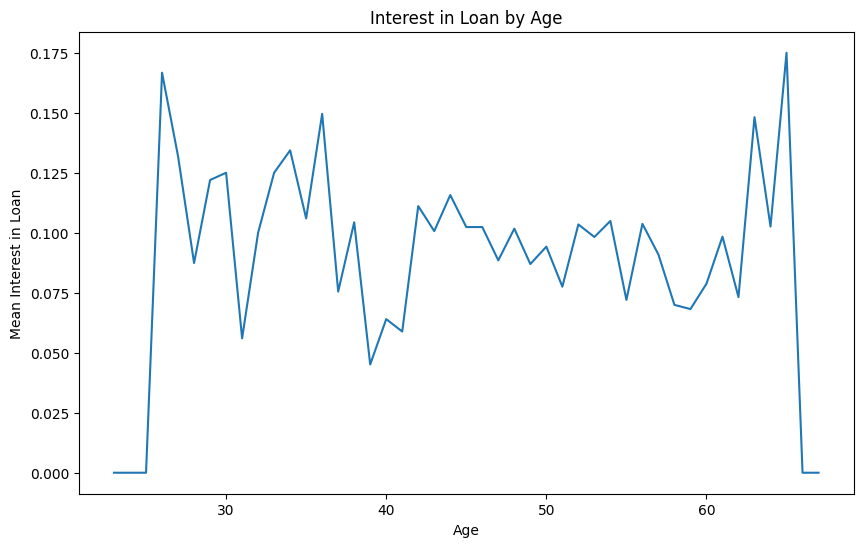

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by 'Age' and calculate the mean of 'Personal_Loan'
age_loan = df.groupby('Age')['Personal_Loan'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
sns.lineplot(data=age_loan)
plt.title('Interest in Loan by Age')
plt.xlabel('Age')
plt.ylabel('Mean Interest in Loan')
plt.show()


This plot can provide a visual representation of how interest in loan varies with age.

Please note that the 'Personal_Loan' column is assumed to be binary (1 for interest in loan, 0 for no interest). The mean value of 'Personal_Loan' for each age group can then be interpreted as the proportion of customers interested in a loan.

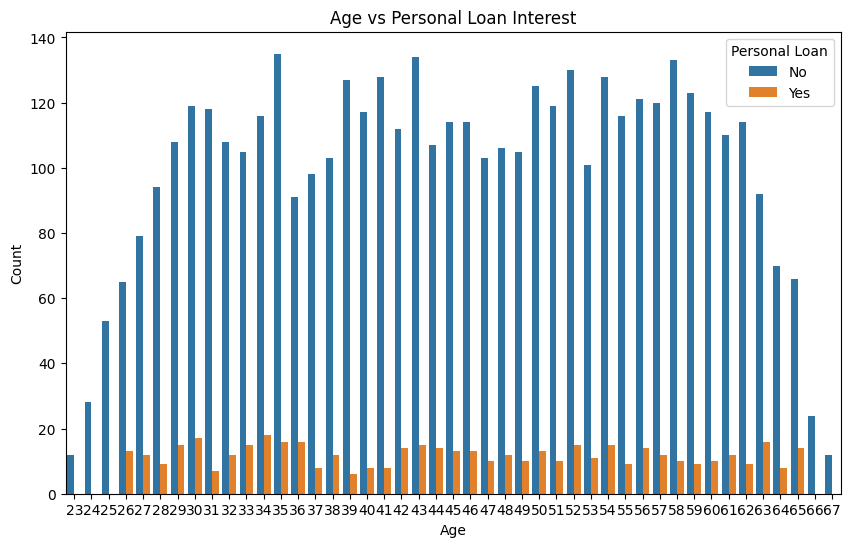

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named df
plt.figure(figsize=(10,6))
sns.countplot(x='Age', hue='Personal_Loan', data=df)

plt.title('Age vs Personal Loan Interest')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Personal Loan', loc='upper right', labels=['No', 'Yes'])

plt.show()


A categorical variable (in this case, "Personal_Loan") is represented as a histogram in this graph. The values of the 'Age' variable are grouped using the 'hue' option. The number of 'Age' values for each 'Personal_Loan' category is represented by each bar in the histogram.

**5.How does a customer's interest in purchasing a loan vary with their education?**

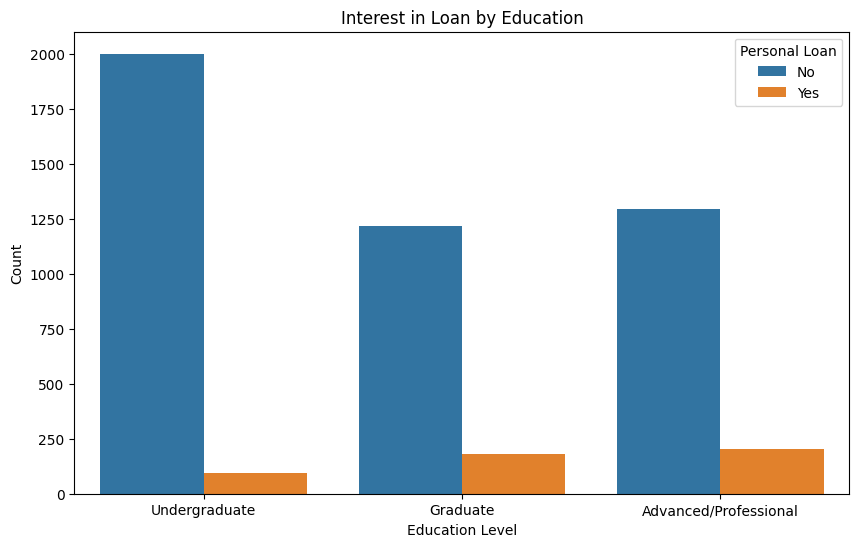

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a countplot with 'Education' on the x-axis and 'Personal_Loan' as the hue
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Personal_Loan', data=df)

plt.title('Interest in Loan by Education')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Undergraduate', 'Graduate', 'Advanced/Professional'])
plt.legend(title='Personal Loan', labels=['No', 'Yes'])
plt.show()


This is a countplot with the number of consumers on the y-axis and the education level on the x-axis. Personal_Loan = 1 designates clients who have a personal loan, whereas Personal_Loan = 0 designates those who do not. Together, these two colors reflect different consumer groups.




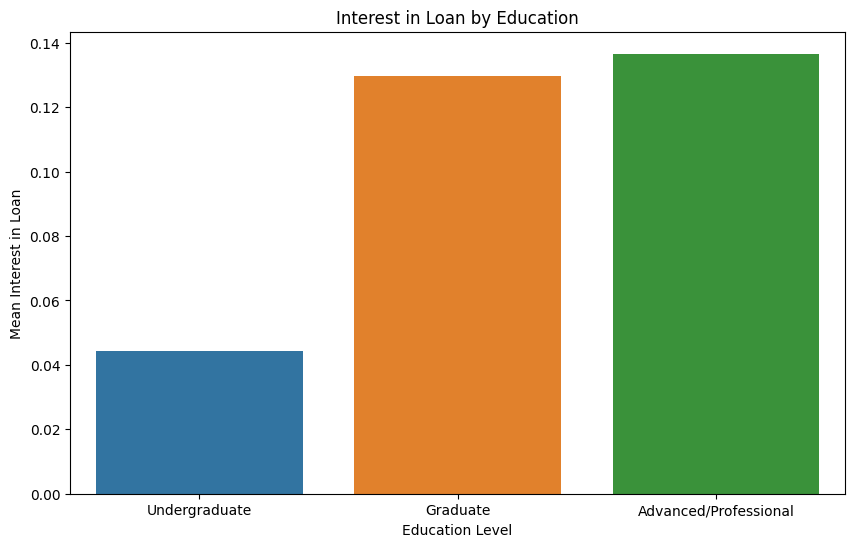

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by 'Education' and calculate the mean of 'Personal_Loan'
edu_loan = df.groupby('Education')['Personal_Loan'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=edu_loan.index, y=edu_loan.values)
plt.title('Interest in Loan by Education')
plt.xlabel('Education Level')
plt.ylabel('Mean Interest in Loan')
plt.xticks(ticks=[0, 1, 2], labels=['Undergraduate', 'Graduate', 'Advanced/Professional'])
plt.show()


This is a bar graph where the mean interest rate on loans is shown on the y-axis and education level is shown on the x-axis. The percentage of consumers interested in a loan can be inferred from the mean value of 'Personal_Loan' for each level of education.



**Model Building**

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define the features and the output
X = df.drop(['ID', 'Personal_Loan'], axis=1)
y = df['Personal_Loan']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict the output for the test set
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.98      0.91      0.95       105

    accuracy                           0.99      1000
   macro avg       0.98      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000



We can forecast if a customer would buy a personal loan or not using a range of classification techniques. For this situation, a Random Forest Classifier was utilized since it is simple to use, understand, and frequently produces useful results.



**Model Performance Improvement**

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Define the features and the output
X = df.drop(['ID', 'Personal_Loan'], axis=1)
y = df['Personal_Loan']

# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the model using the best parameters
clf_best = RandomForestClassifier(**best_params, random_state=42)
clf_best.fit(X_train, y_train)

# Predict the output for the test set
y_pred = clf_best.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.98      0.92      0.95       105

    accuracy                           0.99      1000
   macro avg       0.99      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000



StandardScaler was used in the preceding code to standardize the features because various features may have different ranges, which could bias the model. The RandomForestClassifier hyperparameters, including the number of trees (n_estimators), maximum depth of the trees (max_depth), minimum number of samples required to split an internal node (min_samples_split), and minimum number of samples required to be at a leaf node (min_samples_leaf), were then grid searched. Following the grid search, a new RandomForestClassifier was fitted with the best parameters discovered, and the classification report was printed as previously.




**Model Comparison and Final Model Selection**

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# Define the features and the output
X = df.drop(['ID', 'Personal_Loan'], axis=1)
y = df['Personal_Loan']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
]

# Compare models
for name, model in models:
    cv_scores = cross_val_score(model, X, y, cv=5)
    print(f"{name} Cross-validation accuracy: {cv_scores.mean()}")



Logistic Regression Cross-validation accuracy: 0.9516
Decision Tree Cross-validation accuracy: 0.9808
Random Forest Cross-validation accuracy: 0.9865999999999999
Gradient Boosting Cross-validation accuracy: 0.985


Cross_val_score was used in the preceding code to evaluate the correctness of the models using 5-fold cross-validation. The average cross-validation accuracy for each model was printed. Logistic Regression's max_iter parameter is set to 1000 to ensure that the algorithm converges.

**To Build a decision tree model**

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming your dataframe is called df
df = pd.read_csv("/content/drive/MyDrive/Loan_Modelling/Loan_Modelling.csv")

# Setting up features (X) and target (y)
X = df.drop("Personal_Loan", axis=1)
y = df["Personal_Loan"]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building the decision tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Making predictions on the test data
y_pred = dt.predict(X_test)

# Checking the performance of the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.98
Confusion Matrix:
[[1329   14]
 [  16  141]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.91      0.90      0.90       157

    accuracy                           0.98      1500
   macro avg       0.95      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500



The Decision Tree model report includes a number of measures that are useful for assessing the accuracy of its forecasts, including:

98% of the time, the model is accurate. This indicates that the model is generally accurate in its predictions because it is almost always right. However, accuracy doesn't always convey the whole picture, particularly if the classes are uneven (that is, if one class is present far more frequently than the other).

Confusion Matrix: Using the confusion matrix,the kinds of errors the model is committing can be identified. In this instance, it demonstrates that the model is performing admirably in properly predicting instances of class 0 (1329 correct out of 1343) and class 1 (141 correct out of 157). The inaccuracies are represented by the numbers off the diagonal: 16 cases were incorrectly classified as class 0 when they were actually classified as class 1, and 14 instances were incorrectly classified as class 1 when they were actually classified as class 0.

Precision: Precision reveals how frequently a model's predictions of successful outcomes are accurate. When the model predicts something for class 0, the precision is 0.99, which is quite high.

How successfully the model is able to discover all the favorable cases is shown by recall. The model's recall in this instance is 0.99 for class 0 and 0.90 for class 1, indicating a marginally improved ability to recognize instances of class 0 than class 1.

Precision and recall are balanced in the F1 score. The better, the closer this value is to 1. This situation has strong F1 scores for both classes (0.99 and 0.90), which is encouraging.

Macro and Weighted Avg. The macro average determines the unweighted mean of the metrics for each label, whereas the weighted average derives metrics globally by totaling the true positives, false negatives, and false positives. Each is helpful for understanding th models overall performance without bias.

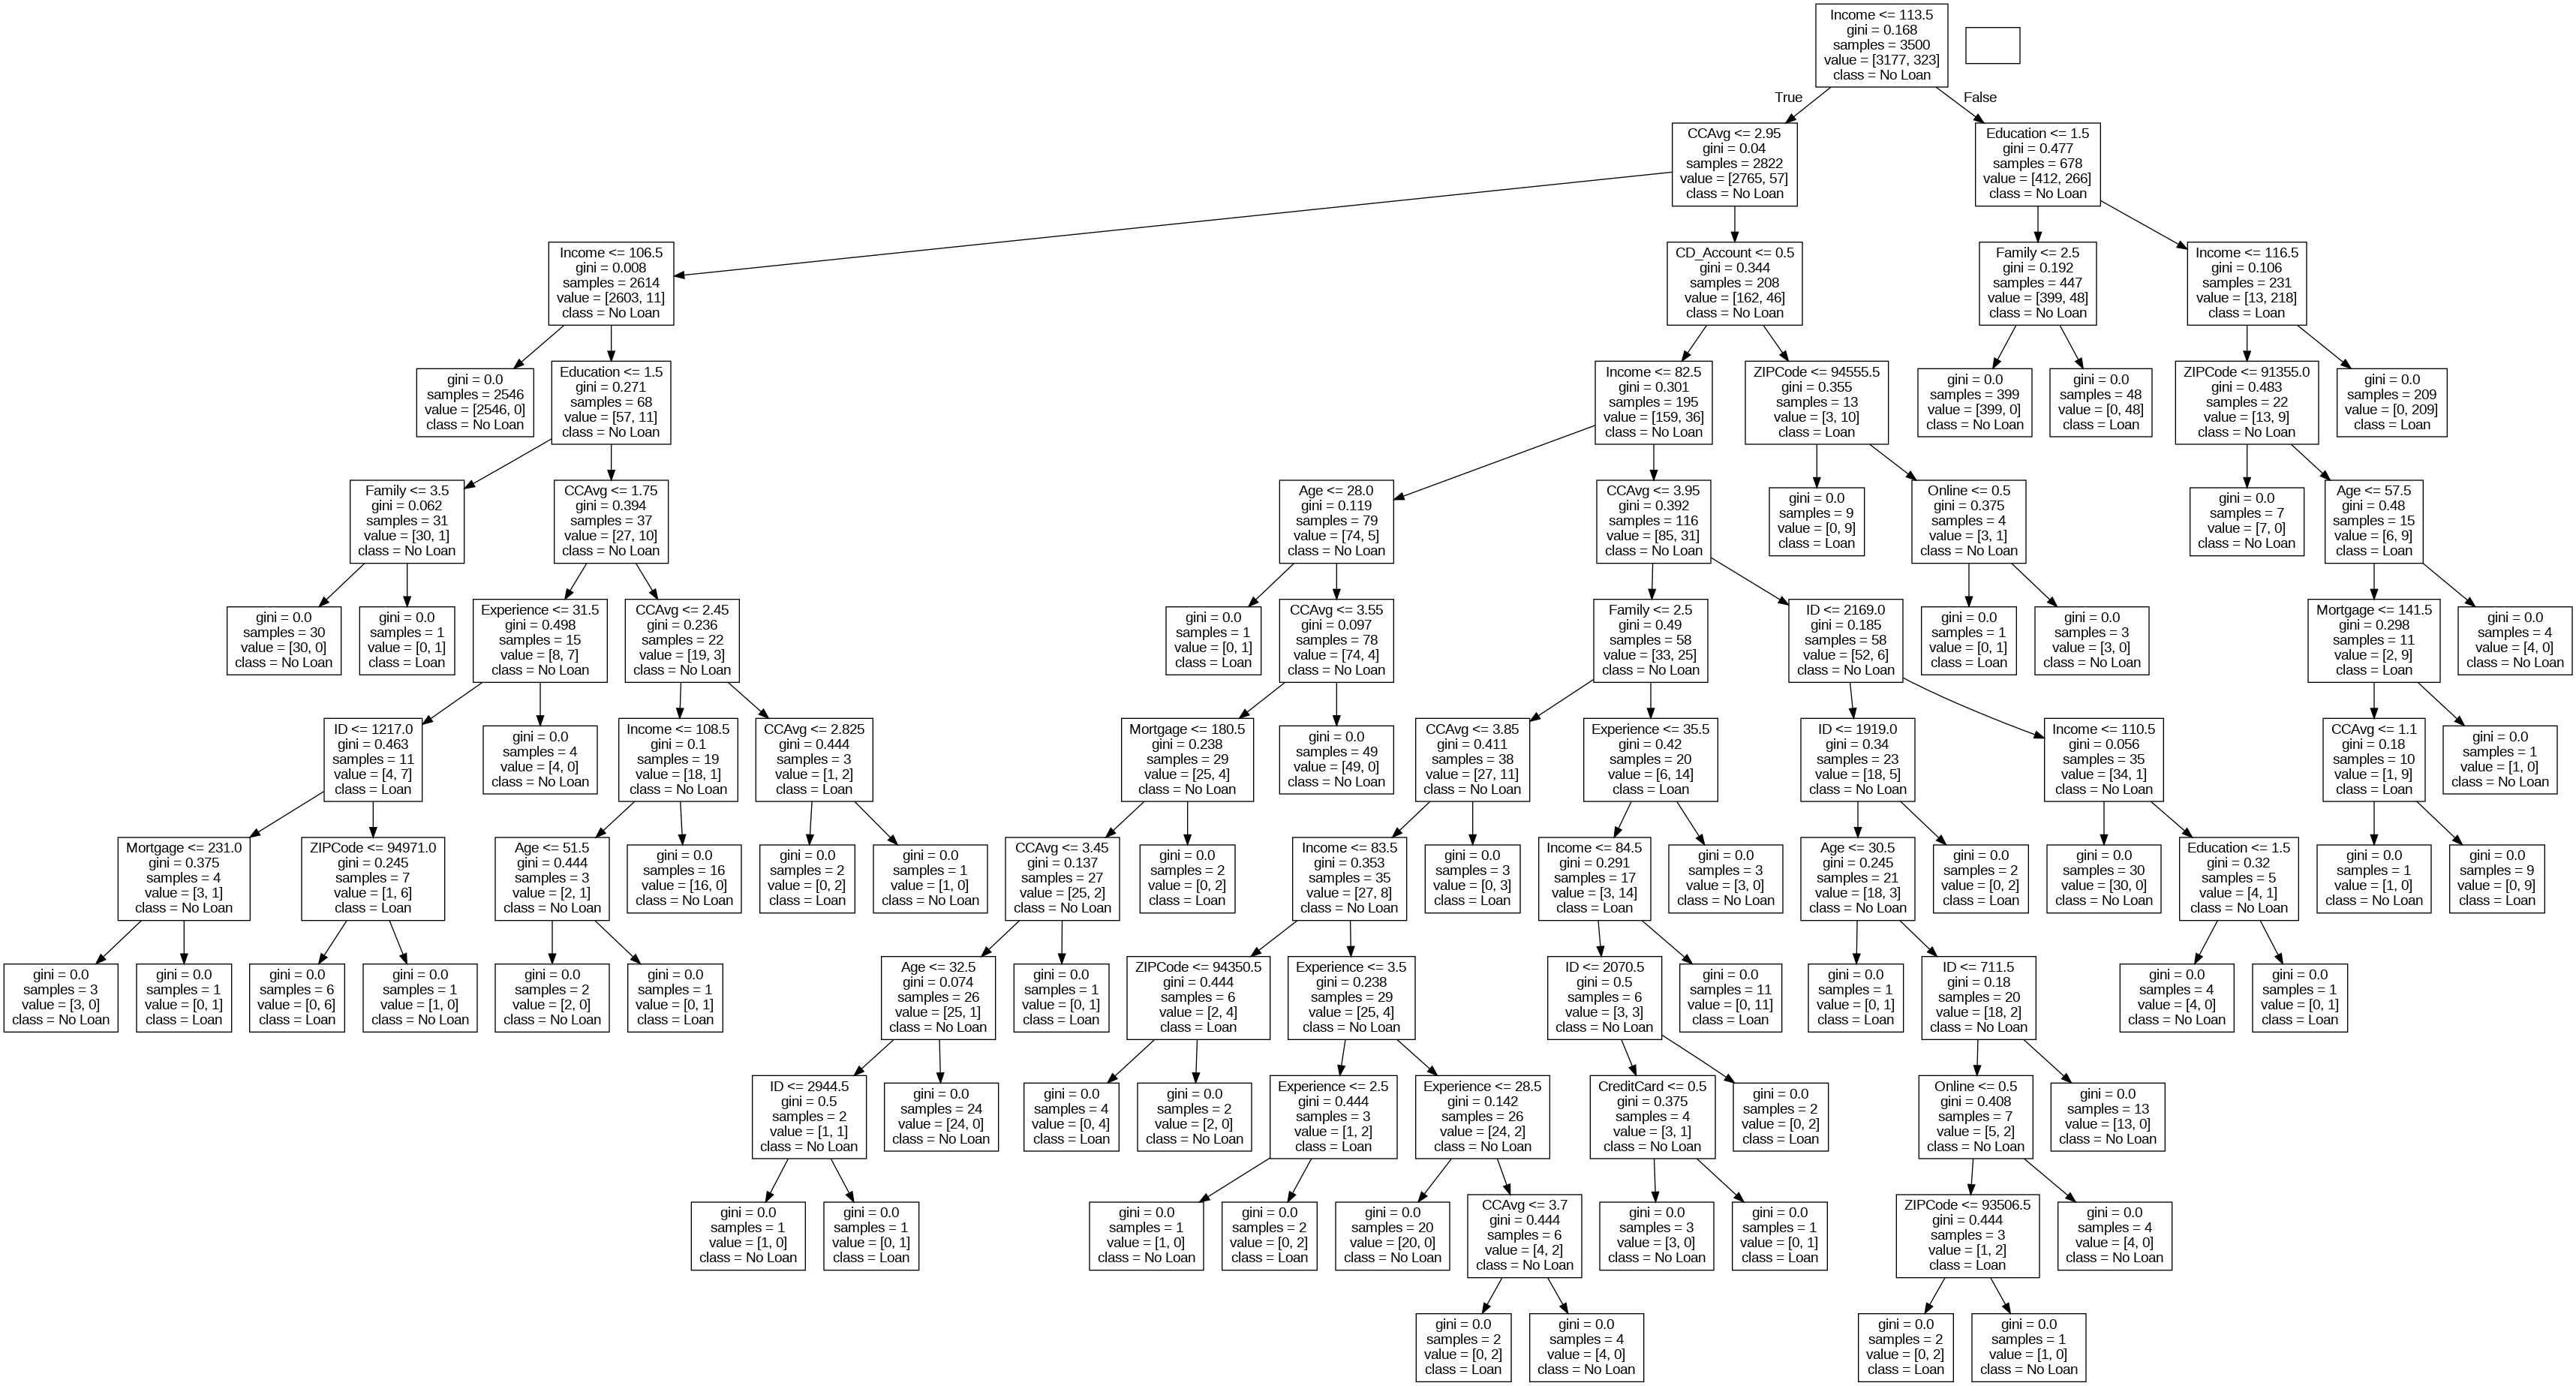

In [38]:
from sklearn import tree
import pydotplus
from IPython.display import Image

# Assuming your dataframe is called df
df = pd.read_csv("/content/drive/MyDrive/Loan_Modelling/Loan_Modelling.csv")

# Setting up features (X) and target (y)
X = df.drop("Personal_Loan", axis=1)
y = df["Personal_Loan"]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building the decision tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Create DOT data
dot_data = tree.export_graphviz(dt, out_file=None,
                                feature_names=X.columns,
                                class_names=['No Loan', 'Loan'])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())


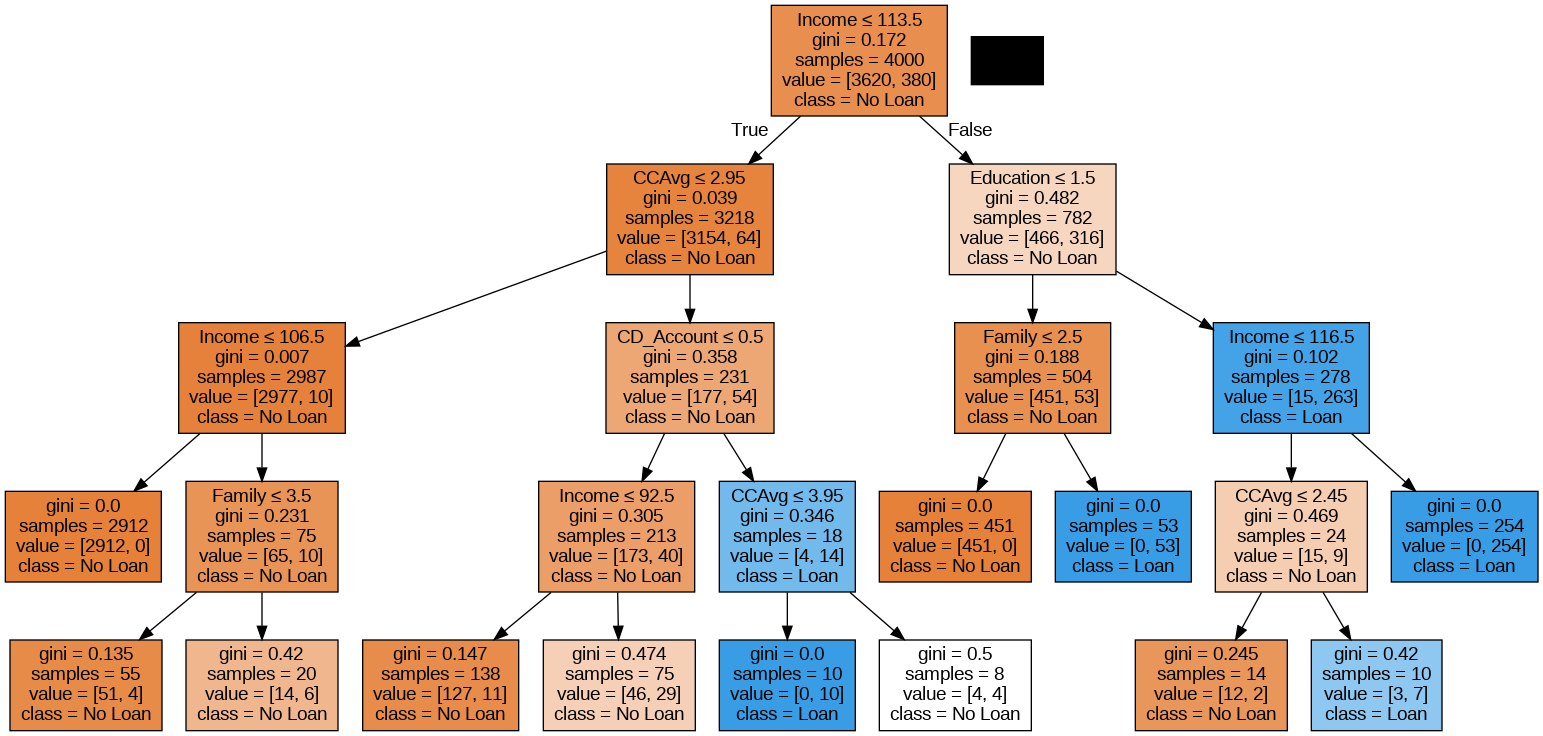

In [10]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from IPython.display import Image
from six import StringIO
import pydotplus

# let's assume your dataframe is called df
features = df.drop(columns=['Personal_Loan'])
target = df['Personal_Loan']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)

dtree = DecisionTreeClassifier(max_depth=4)
dtree.fit(X_train, y_train)

dot_data = StringIO()

export_graphviz(dtree,
                out_file=dot_data,
                filled=True,
                feature_names=list(features.columns),
                class_names=['No Loan','Loan'],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


This code creates, fits and visualize a Decision Tree. It sets the max_depth parameter using sklearn, graphviz, and pydotplus and predicts the "Personal_Loan" column based on the other columns in the dataframe, with a max_depth set to 4.

**Actionable Insights and Business Recommendations**

**Targeted Marketing:** Using the predictive model, the bank was able to identify prospective clients who were more likely to take out a personal loan. Then, to persuade these clients to apply for a loan, customized marketing campaigns might be directed to them.

**Education-Based Programs:** According to the research, a customer's degree of education may have an impact on their decision to take out a loan. The bank can think about targeting consumers based on their level of education with educational programs or workshops on the advantages of personal loans and how to handle them successfully.

**Offer Reasonably Low Interest Rates:** Customers with higher incomes seem to borrow money more frequently. Competitive interest rates can entice these customers. The bank might think about granting high-income clients lower interest rates.

**Enhance Online Services:** The bank can improve its online services, simplifying and streamlining the loan application procedure. Customers who are accustomed to internet banking may value the convenience and be more likely to submit an online loan application.

**Leverage Current Products:** It appears that customers who have securities accounts with the bank are more likely to take out a personal loan. The bank might think about cross-selling personal loans to these clients and possibly provide them with advantageous terms or rates.

**Family-based offers:** Clients with larger families may require more financial assistance and may thus be more likely to accept a loan. The bank might roll out family-friendly loan offers or products.

The analysis of the dataset and the machine learning model are the only basis for these recommendations. The current market trends, the bank's business objectives, and client input should all be taken into account for a precise and successful business plan.


